# Customer Segmentation - Clustering
* Müşteri Segmentasyonu ve RFM Analizi Projesi

<img src= https://www.dannidanliu.com/content/images/2024/07/Blog-83--Customer-Segmentation-1.jpg width=700 heigh=400>

## Projenin Amacı
Bu projenin temel amacı, bir şirketin müşteri tabanını analiz ederek anlamlı segmentlere ayırmak ve bu segmentlerin özelliklerini belirlemektir. Bu sayede şirket:
- Hedefli pazarlama kampanyaları geliştirebilir
- Müşteri satın alma davranışlarını daha iyi anlayabilir
- Kaynaklarını en değerli müşteri gruplarına odaklayabilir

### 1. Veri Yapılandırma
- CSV dosyasından üç ayrı DataFrame oluşturma (Müşteri, Ürün, Sipariş)
- SQLite veritabanı entegrasyonu
- Veri birleştirme işlemleri

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("PBL5recommendationdata.csv", encoding = "latin-1")

In [3]:
df.head()

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,...,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF61071,0.0,NaN
1,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF02132,NaN,NaN
2,3,John,Smith,Company1,1386089139,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2 x Extra large,Nitrile,NaN,NaN,NaN,PF00342,0.0,NaN
3,4,James,Anderson,NaN,1386780263,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF04970,NaN,NaN
4,5,Abraham,Pollak,Company3,1386861599,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PF03045,NaN,NaN


In [4]:
df.shape

(4194, 181)

In [5]:
df.columns

Index(['Customers.id', 'Customers.fname', 'Customers.lname',
       'Customers.company', 'Customers.create_date', 'Customers.status',
       'Customers.mailing', 'Customers.reminders', 'Customers.tax_exempt',
       'Customers.account_id',
       ...
       'Products.google_shopping_label', 'Products.product_option',
       'Products.size', 'Products.material', 'Products.arm_style',
       'Products.leg_style', 'Products.seat_size', 'Products.family_id',
       'Products.saved_status', 'Products.freight_cost'],
      dtype='object', length=181)

In [6]:
df.isnull().sum()

Customers.id                0
Customers.fname             0
Customers.lname             0
Customers.company        3467
Customers.create_date       0
                         ... 
Products.leg_style       4194
Products.seat_size       4032
Products.family_id        325
Products.saved_status     264
Products.freight_cost    4194
Length: 181, dtype: int64

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.columns.tolist()

['Customers.id',
 'Customers.fname',
 'Customers.lname',
 'Customers.company',
 'Customers.create_date',
 'Customers.status',
 'Customers.mailing',
 'Customers.reminders',
 'Customers.tax_exempt',
 'Customers.account_id',
 'Customers.sales_rep',
 'Customers.rewards',
 'Customers.profile_id',
 'Customers.last_modified',
 'Customers.customer_type',
 'Orders.id',
 'Orders.customer_id',
 'Orders.fname',
 'Orders.lname',
 'Orders.company',
 'Orders.order_number',
 'Orders.reorder_id',
 'Orders.external_source',
 'Orders.external_id',
 'Orders.currency',
 'Orders.sales_rep',
 'Orders.subtotal',
 'Orders.tax',
 'Orders.shipping',
 'Orders.coupon_id',
 'Orders.coupon_amount',
 'Orders.gift_id',
 'Orders.gift_amount',
 'Orders.fee_name',
 'Orders.fee_amount',
 'Orders.discount_name',
 'Orders.discount_amount',
 'Orders.total',
 'Orders.balance_due',
 'Orders.shipping_carrier',
 'Orders.shipping_method',
 'Orders.shipping_trans',
 'Orders.shipping_flags',
 'Orders.weight',
 'Orders.tracking',
 '

In [9]:
customers_cols = [col for col in df.columns if col.startswith('Customers.')]

In [10]:
customers = df[customers_cols].copy()

In [11]:
customers.columns = [col.replace('Customers.', '') for col in customers.columns]

In [12]:
products_cols = [col for col in df.columns if col.startswith('Products.')]

In [13]:
products = df[products_cols].copy()

In [14]:
products.columns = [col.replace('Products.', '') for col in products.columns]

In [15]:
orders_cols = [col for col in df.columns if col.startswith('Orders.')]

In [16]:
orders = df[orders_cols].copy()

In [17]:
orders.columns = [col.replace('Orders.', '') for col in orders.columns]

In [18]:
df['Orders.placed_date'].head(10)

0    1426019099
1    1386090455
2    1449603652
3    1386780263
4    1386861599
5    1394380527
6    1410363655
7    1388155947
8    1389303216
9    1390509516
Name: Orders.placed_date, dtype: int64

In [19]:
orders['placed_date'] = pd.to_datetime(orders['placed_date'], unit='s')

In [20]:
orders['placed_date'].head()

0   2015-03-10 20:24:59
1   2013-12-03 17:07:35
2   2015-12-08 19:40:52
3   2013-12-11 16:44:23
4   2013-12-12 15:19:59
Name: placed_date, dtype: datetime64[ns]

In [21]:
import sqlite3

In [22]:
conn = sqlite3.connect("company.db")

customers.to_sql("Customers", conn, index=False, if_exists="replace")
products.to_sql("Products", conn, index=False, if_exists="replace")
orders.to_sql("Orders", conn, index=False, if_exists="replace")

conn.commit()

In [23]:
customers_db = pd.read_sql("SELECT * FROM Customers", conn)
products_db = pd.read_sql("SELECT * FROM Products", conn)
orders_db = pd.read_sql("SELECT * FROM Orders", conn)

merged_df = orders.merge(customers, 
                         left_on='customer_id',  
                         right_on='id',           
                         how='left',
                         suffixes=('_order', '_customer'))

In [24]:
merged_df.to_csv("rfm_data.csv", index=False, encoding='utf-8')

### 2. RFM Analizi
- **Recency (Güncellik)**: Müşterinin son alışverişinden bu yana geçen süre
- **Frequency (Sıklık)**: Müşterinin toplam alışveriş sayısı
- **Monetary (Parasal Değer)**: Müşterinin toplam harcama miktarı

In [25]:
data = pd.read_csv("rfm_data.csv")

In [26]:
import datetime as dt

In [27]:
merged_df['placed_date'] = pd.to_datetime(merged_df['placed_date'], unit='s')

now = merged_df['placed_date'].max() + pd.Timedelta(days=1)

recency = now - merged_df.groupby('customer_id')['placed_date'].max()
recency = recency.dt.days

frequency = merged_df.groupby('customer_id')['id_order'].count()

monetary = merged_df.groupby('customer_id')['total'].sum()

rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

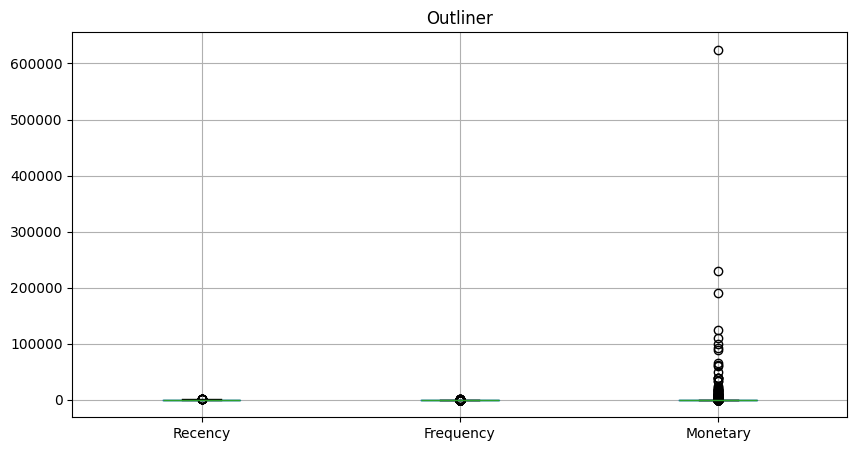

In [28]:
rfm[['Recency', 'Frequency', 'Monetary']].boxplot(figsize=(10, 5))
plt.title('Outliner')
plt.show()

In [29]:
outliers = rfm.quantile(q=0.97)
rfm = rfm[(rfm['Frequency'] < outliers['Frequency']) & 
          (rfm['Monetary'] < outliers['Monetary'])]

In [30]:
rfm.head(10)

,Recency,Frequency,Monetary
customer_id,,,
3,160,4,217.44
4,888,1,29.55
5,615,9,374.97
7,872,1,49.14
8,858,1,69.70
10,844,1,34.00
11,844,1,34.00
12,843,1,31.47
13,454,9,968.79


In [31]:
rfm.describe()

,Recency,Frequency,Monetary
count,2927.000000,2927.00000,2927.000000
mean,234.172532,1.48548,153.318814
std,213.599164,1.46188,265.310164
min,1.000000,1.00000,2.890000
25%,61.000000,1.00000,38.230000
50%,149.000000,1.00000,69.510000
75%,367.000000,1.00000,137.780000
max,888.000000,9.00000,2453.940000


### 3. Müşteri Segmentasyonu
- KMeans algoritması kullanarak müşteri kümeleme
- Optimal küme sayısının bilimsel gerekçelerle belirlenmesi
- Her segmentin karakteristik özelliklerinin tanımlanması

In [32]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [33]:
x = rfm[['Recency', 'Frequency', 'Monetary']]

In [34]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [35]:
wcss = []
ss = []

for i in range(2, 10):
    model = KMeans(n_clusters=i, random_state=42, n_init=10)
    model = model.fit(x_scaled)
    tahmin = model.predict(x_scaled)
    
    ss1 = silhouette_score(x_scaled, tahmin)
    ss.append(ss1)
    print(f"k={i}: Silhouette Score = {ss1:.4f}")
    
    wcss.append(model.inertia_)

k=2: Silhouette Score = 0.6291
k=3: Silhouette Score = 0.5186
k=4: Silhouette Score = 0.5780
k=5: Silhouette Score = 0.5325
k=6: Silhouette Score = 0.5426
k=7: Silhouette Score = 0.5461
k=8: Silhouette Score = 0.5498
k=9: Silhouette Score = 0.4998


In [36]:
from yellowbrick.cluster import KElbowVisualizer

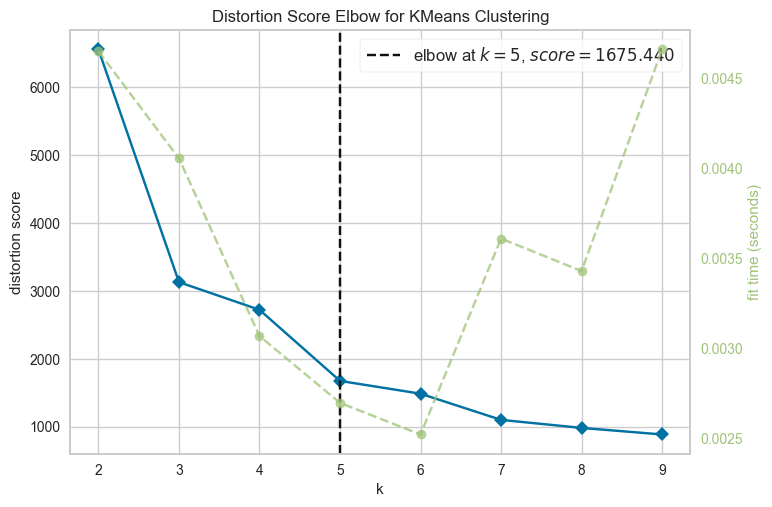

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
km = KMeans(random_state=42)
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(x_scaled)
vis.show()

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [39]:
data = linkage(x_scaled, method='ward', metric='euclidean')

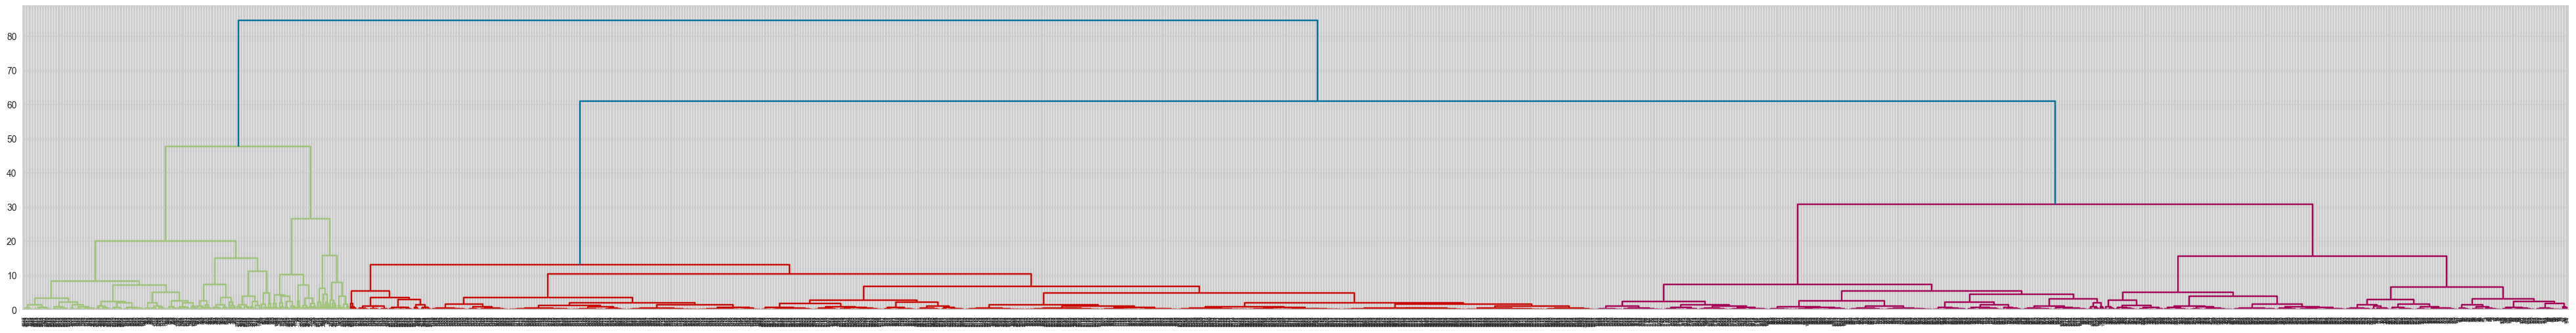

In [55]:
plt.figure(figsize=(50,6)) 
dendrogram(data);
plt.show()

In [41]:
from sklearn.cluster import KMeans

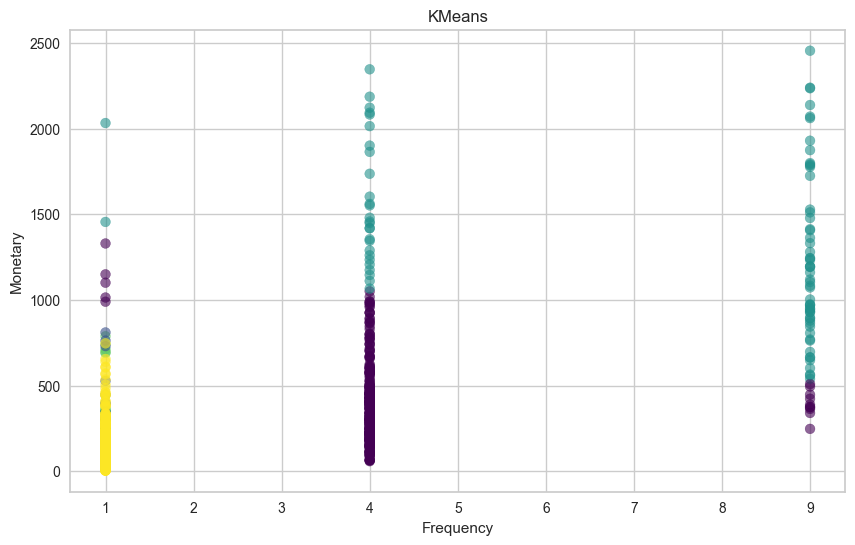

In [56]:
optimal_k = 5
final_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
rfm['Segment'] = final_model.fit_predict(x_scaled)


plt.figure(figsize=(10, 6))
plt.scatter(rfm['Frequency'], rfm['Monetary'], 
            c=rfm['Segment'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('KMeans')
plt.show()

In [43]:
segment_summary = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).round(2)
segment_summary.columns = ['Recency', 'Frequency', 'Monetary', 'Total_Revenue']
segment_summary['Count'] = rfm.groupby('Segment').size()
print(segment_summary)

         Recency  Frequency  Monetary  Total_Revenue  Count
Segment                                                    
0         195.81       4.13    405.74      113202.00    279
1         336.49       1.00     88.68       63143.49    712
2         185.64       7.24   1351.30      116211.57     86
3         633.69       1.03     98.96       41264.60    417
4          77.46       1.00     80.21      114942.51   1433


In [44]:
segment_names = {
    0: 'En İyileri',
    1: 'Potansiyel',
    2: 'Sadık Müşteriler',
    3: 'Risk Altında'
}

rfm['Segment_Name'] = rfm['Segment'].map(segment_names)
print(rfm['Segment_Name'].value_counts())

Segment_Name
Potansiyel          712
Risk Altında        417
En İyileri          279
Sadık Müşteriler     86
Name: count, dtype: int64


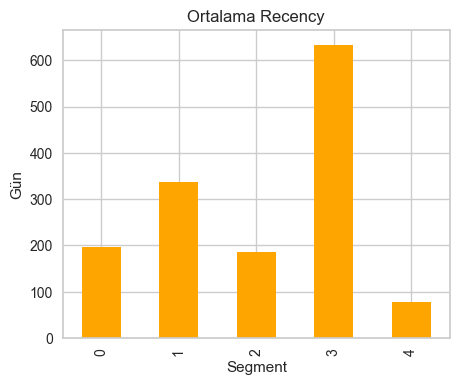

In [45]:
plt.figure(figsize=(5, 4))
rfm.groupby('Segment')['Recency'].mean().plot(kind='bar', color='orange')
plt.title('Ortalama Recency')
plt.ylabel('Gün')
plt.show()

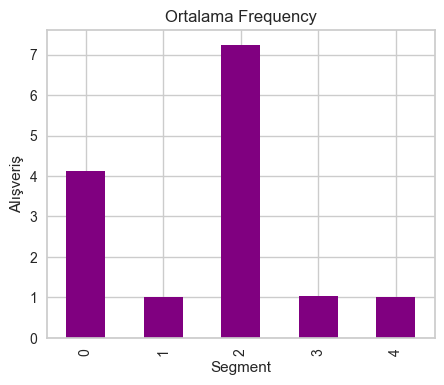

In [46]:
plt.figure(figsize=(5, 4))
rfm.groupby('Segment')['Frequency'].mean().plot(kind='bar', color='purple')
plt.title('Ortalama Frequency')
plt.ylabel('Alışveriş')
plt.show()

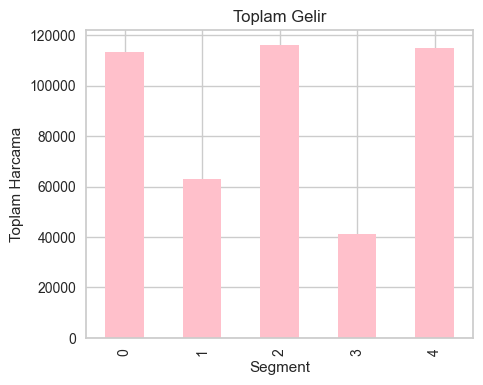

In [47]:
plt.figure(figsize=(5, 4))
rfm.groupby('Segment')['Monetary'].sum().plot(kind='bar', color='pink')
plt.title('Toplam Gelir')
plt.ylabel('Toplam Harcama')
plt.show()

In [48]:
from sklearn.cluster import AgglomerativeClustering

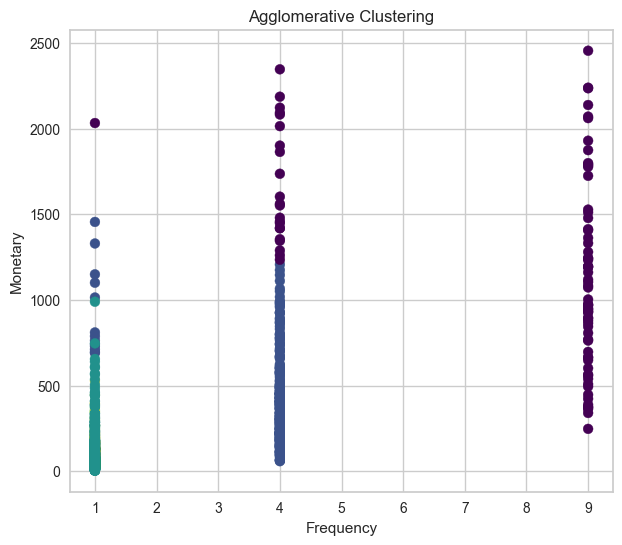

In [49]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
rfm['Agg_Segment'] = agg.fit_predict(x_scaled)

plt.figure(figsize=(7, 6))
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['Agg_Segment'], cmap='viridis', s=50)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Agglomerative Clustering')
plt.show()

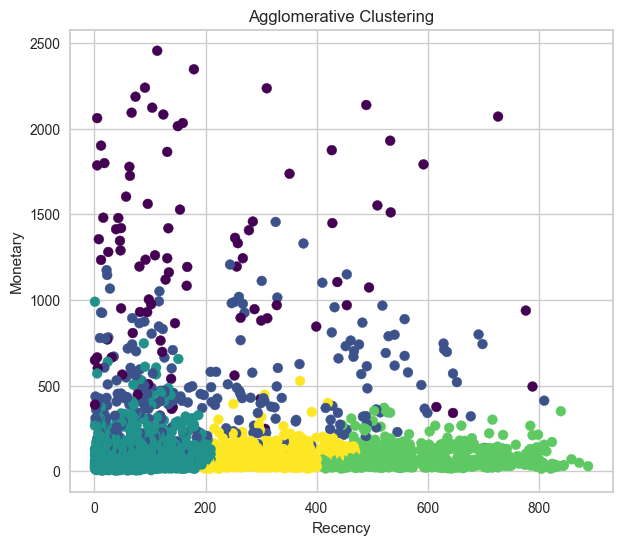

In [50]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
rfm['Agg_Segment'] = agg.fit_predict(x_scaled)

plt.figure(figsize=(7, 6))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['Agg_Segment'], cmap='viridis', s=50)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Agglomerative Clustering')
plt.show()

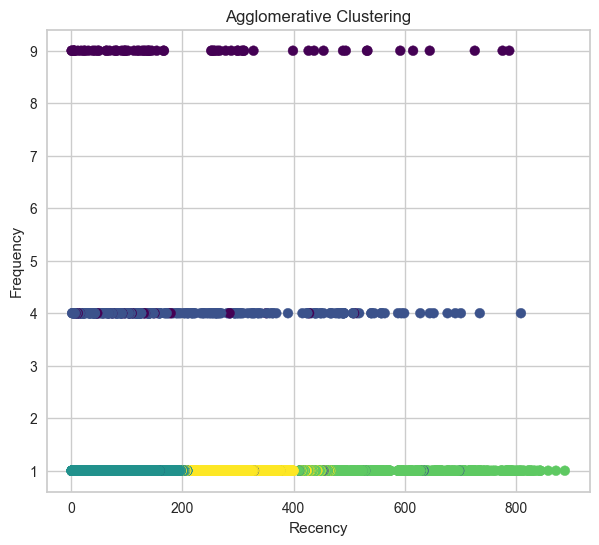

In [51]:
agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
rfm['Agg_Segment'] = agg.fit_predict(x_scaled)

plt.figure(figsize=(7, 6))
plt.scatter(rfm['Recency'], rfm['Frequency'], c=rfm['Agg_Segment'], cmap='viridis', s=50)
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('Agglomerative Clustering')
plt.show()


In [52]:
from sklearn.mixture import GaussianMixture

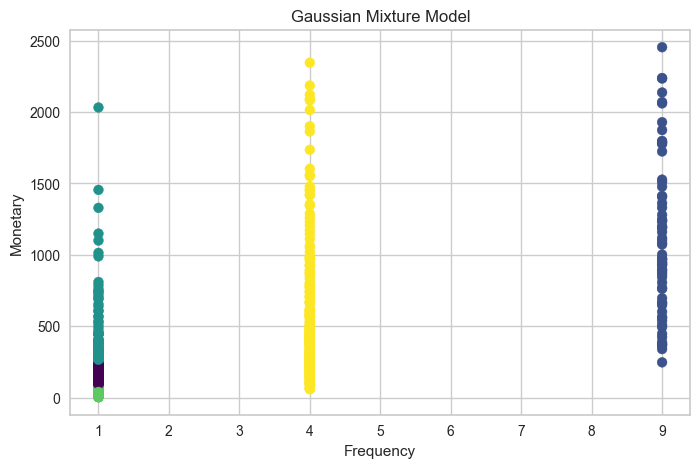

In [53]:
gmm = GaussianMixture(n_components=5, random_state=42)
rfm['GMM_Segment'] = gmm.fit_predict(x_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(rfm['Frequency'], rfm['Monetary'], c=rfm['GMM_Segment'], cmap='viridis', s=50)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Gaussian Mixture Model')
plt.show()

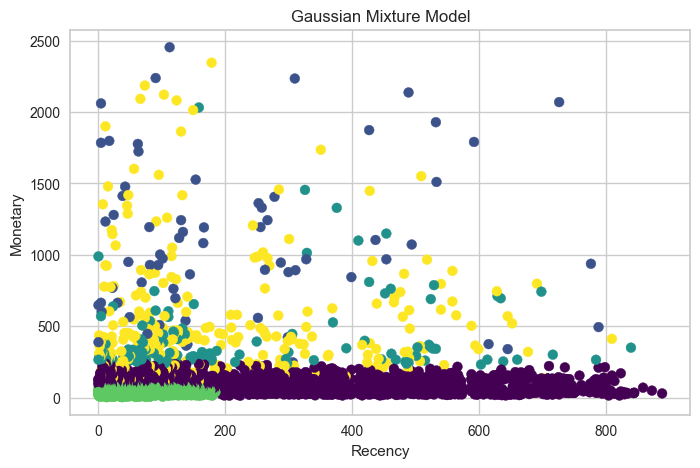

In [54]:
gmm = GaussianMixture(n_components=5, random_state=42)
rfm['GMM_Segment'] = gmm.fit_predict(x_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(rfm['Recency'], rfm['Monetary'], c=rfm['GMM_Segment'], cmap='viridis', s=50)
plt.xlabel('Recency')
plt.ylabel('Monetary')
plt.title('Gaussian Mixture Model')
plt.show()